# 🟡 **Leve2: Medium**

# 🧠 Bagging Classifier on Digits Dataset

In this notebook, we:
- Load and visualize the **Digits dataset**
- Train multiple classifiers (Logistic Regression, Decision Tree, GaussianNB, Random Forest, KNN)
- Apply **Bagging Classifier** to improve performance
- Compare results across models


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
## Step 1: Load Data
data=load_digits()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
x=data.data

In [5]:
y=data.target

<Figure size 640x480 with 0 Axes>

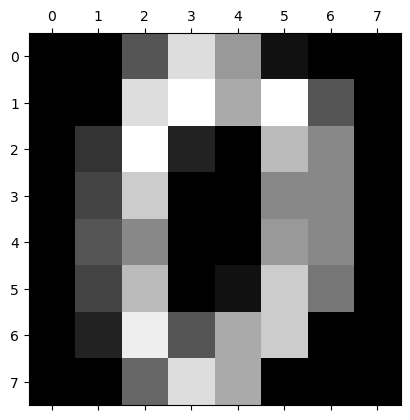

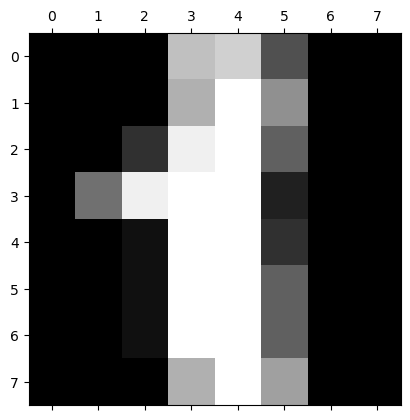

In [6]:
#ploting digits
plt.gray()
for i in range(2):
    plt.matshow(data.images[i])

In [7]:
#train and test data
x,tx,y,ty=train_test_split(x,y,test_size=0.2)

In [8]:
#creat model
models=[LogisticRegression(max_iter=5000),
        RandomForestClassifier(n_estimators=70),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier()]
model={}
len(models)

5

In [9]:
## to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
## Step 2: Train Models and predict
py=pd.DataFrame()
for i,j in zip(range(len(models)),models):
    warnings.filterwarnings("ignore")
    model[i]=BaggingClassifier(estimator=j,n_estimators=70)
    model[i].fit(x,y)
    print(model[i].score(tx,ty))
    py[f"{i}"]=model[i].predict(tx)
py.head()

0.9833333333333333
0.9833333333333333
0.8666666666666667
0.9666666666666667
0.9888888888888889


,0,1,2,3,4
0,8,8,8,8,8
1,8,8,8,8,8
2,1,1,1,1,1
3,7,7,7,7,7
4,3,3,3,3,3


In [11]:
## create confusion matrix
yc={}
for i in range(len(models)):
    yc[i]=confusion_matrix(ty,py[f"{i}"])
    yc[i]

In [12]:
model_names = [
    "Logistic Regression",
    "Random Forest Classifier",
    "GaussianNB",
    "Decision Tree Classifier",
    "K-Neighbors Classifier"
]

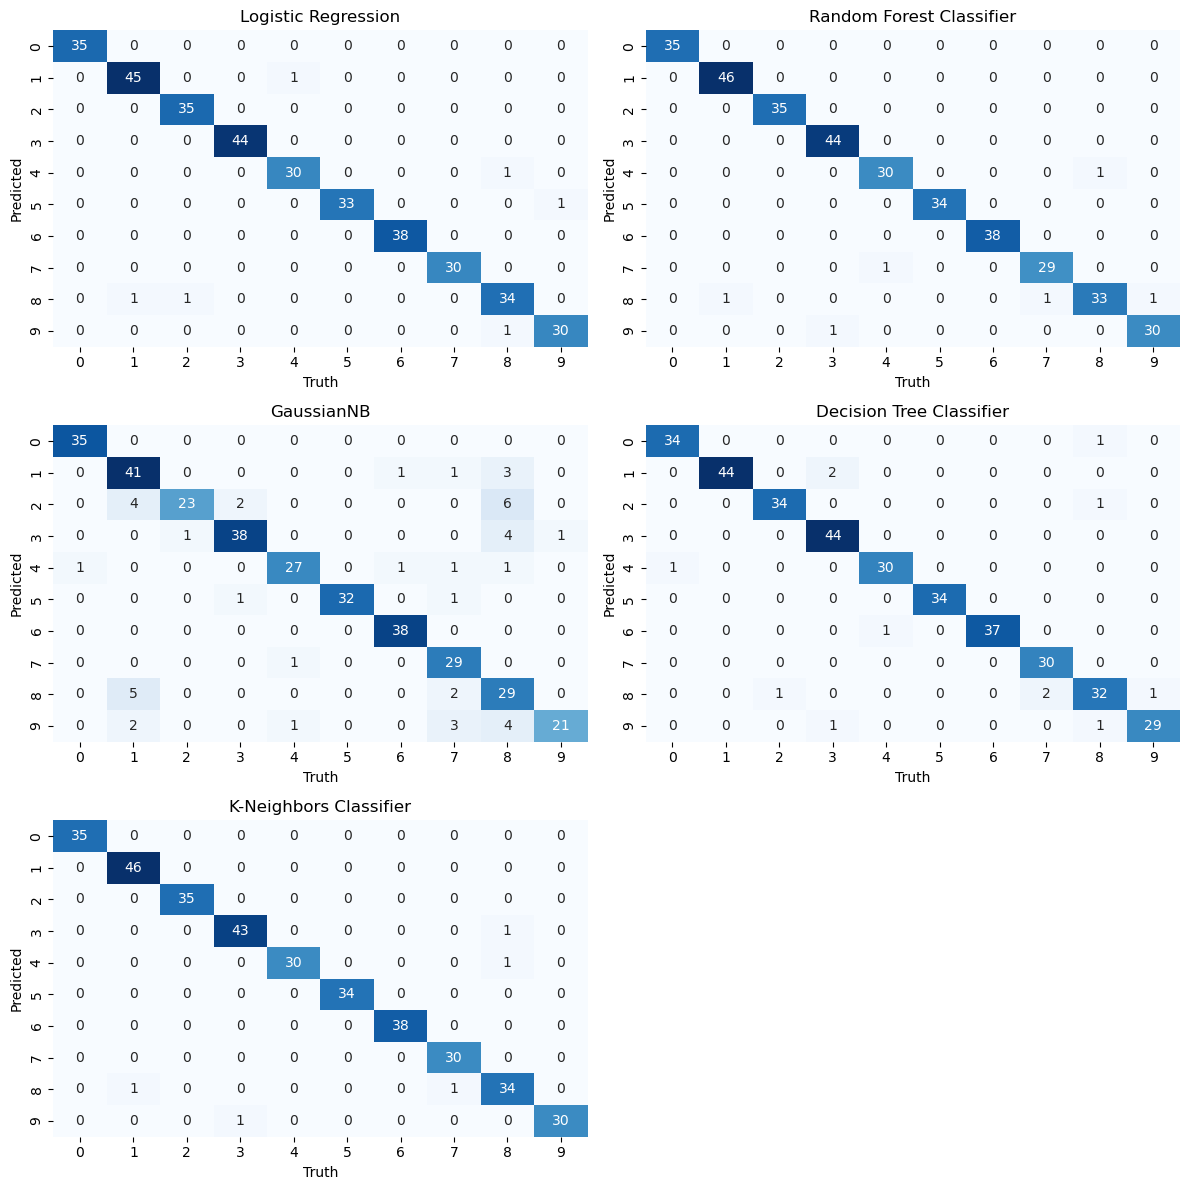

In [13]:
## compare using heatmap 
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 cols
axes = axes.flatten()

for i in range(len(models)):
    sns.heatmap(yc[i], annot=True, cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(model_names[i], fontsize=12)
    axes[i].set_xlabel("Truth")
    axes[i].set_ylabel("Predicted")

# Hide the empty subplot (since 5 models, not 6)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()